| Column  | Discription  |
| :------------: | :------------: |
| work_year  | The year the salary was paid.  |
| experience_level  | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director  |
| employment_type  | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance  |
| job_title  | The role worked in during the year.  |
| salary  | The total gross salary amount paid.  |
| salary_currency  | The currency of the salary paid as an ISO 4217 currency code.  |
| salaryinusd  | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).  |
| employee_residence  | Employee's primary country of residence in during the work year as an ISO 3166 country code.  |
| remote_ratio  | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)  |
| company_location  | The country of the employer's main office or contracting branch as an ISO 3166 country code.  |
| company_size  | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)  |


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [130]:
def vis_count(data, col_list,  fig_size=(20,7), title=None, n_values=None):
    """This function return countplot for the list of inputs
    It takes :
    data : the name of dataframe
    col_list : the list of columns to plot them in countplot
    title : title of the plot(optional)
    """
    n_plots=len(col_list)
    fig, ax = plt.subplots(1, n_plots, figsize=fig_size)
    
    for i, col in enumerate(col_list):
        fig.sca(ax[i])
        sns.countplot(data=data, x=col, order=data[col].value_counts().index[:n_values], color='blue')
        plt.title(col.title().replace('_', ' '))
    fig.suptitle(title, fontsize=20, color='brown')

In [131]:
data = pd.read_csv('ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 40.4+ KB


In [133]:
data.dtypes[data.dtypes=='int64']

Unnamed: 0       int64
work_year        int64
salary           int64
salary_in_usd    int64
remote_ratio     int64
dtype: object

In [134]:
data = data.drop('Unnamed: 0', axis=1)
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [135]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


### Visualization

In [136]:
data['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [137]:
col = [i for i in data.columns if data[i].nunique()<=5]
col

['work_year',
 'experience_level',
 'employment_type',
 'remote_ratio',
 'company_size']

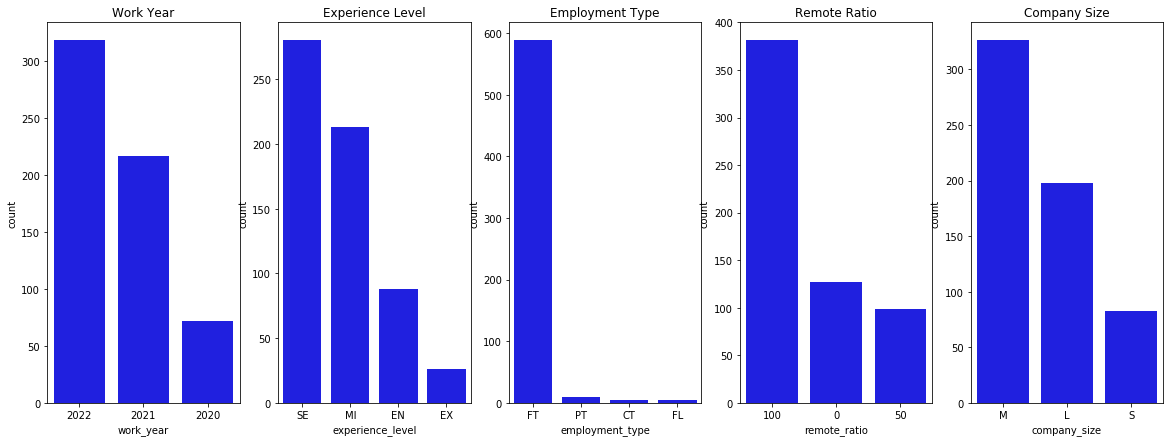

In [138]:
vis_count(data, col)

We can observe that : 
- The demand for data scientist roles is increasing over years.
- Senior level is the most frequency
- Most jobs is a full time
- Most companies have about 250 employees (medium)
- Most jobs are fully remotely

In [139]:
col = [i for i in data.columns if data[i].nunique()>5]
col

['job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'company_location']

In [140]:
data['job_title'].value_counts()[:10]

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Data Analytics Manager          7
Name: job_title, dtype: int64

In [141]:
data['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [142]:
query = 'Data Scientist'
choices = data['job_title'].unique()

out = process.extract(query, choices, limit=25, scorer=fuzz.partial_token_sort_ratio)
out[:12]

[('Data Scientist', 100),
 ('Applied Data Scientist', 100),
 ('Staff Data Scientist', 100),
 ('AI Scientist', 92),
 ('Lead Data Scientist', 79),
 ('Research Scientist', 79),
 ('Principal Data Scientist', 79),
 ('Data Science Consultant', 77),
 ('Machine Learning Scientist', 71),
 ('Applied Machine Learning Scientist', 71),
 ('Data Specialist', 71),
 ('Data Engineer', 62)]

In [143]:
ds_filtered = [i[0] for i in out if i[1]>=75]
ds_filtered

['Data Scientist',
 'Applied Data Scientist',
 'Staff Data Scientist',
 'AI Scientist',
 'Lead Data Scientist',
 'Research Scientist',
 'Principal Data Scientist',
 'Data Science Consultant']

In [144]:
query = 'Machine Learning Engineer'
choices = data['job_title'].unique()

out = process.extract(query, choices, limit=25, scorer=fuzz.token_sort_ratio)
out[:18]

[('Machine Learning Engineer', 100),
 ('Lead Machine Learning Engineer', 91),
 ('Machine Learning Developer', 82),
 ('Machine Learning Infrastructure Engineer', 77),
 ('Head of Machine Learning', 73),
 ('Machine Learning Manager', 65),
 ('Data Engineering Manager', 65),
 ('Machine Learning Scientist', 63),
 ('Applied Machine Learning Scientist', 61),
 ('Data Science Engineer', 57),
 ('Lead Data Engineer', 56),
 ('ML Engineer', 56),
 ('Principal Data Engineer', 54),
 ('NLP Engineer', 54),
 ('Director of Data Engineering', 45),
 ('Data Engineer', 42),
 ('Computer Vision Engineer', 41),
 ('Computer Vision Software Engineer', 41)]

In [145]:
ml_filtered = [i[0] for i in out if i[1]>=60]
ml_filtered

['Machine Learning Engineer',
 'Lead Machine Learning Engineer',
 'Machine Learning Developer',
 'Machine Learning Infrastructure Engineer',
 'Head of Machine Learning',
 'Machine Learning Manager',
 'Data Engineering Manager',
 'Machine Learning Scientist',
 'Applied Machine Learning Scientist']

In [146]:
# we need to del 'Data Engineering Manager' from last list
ml_filtered.remove('Data Engineering Manager')

In [147]:
ml_filtered

['Machine Learning Engineer',
 'Lead Machine Learning Engineer',
 'Machine Learning Developer',
 'Machine Learning Infrastructure Engineer',
 'Head of Machine Learning',
 'Machine Learning Manager',
 'Machine Learning Scientist',
 'Applied Machine Learning Scientist']

In [148]:
query = 'Data Analyst'
choices = data['job_title'].unique()

out = process.extract(query, choices, limit=25, scorer=fuzz.token_sort_ratio)
out[:18]

[('Data Analyst', 100),
 ('BI Data Analyst', 89),
 ('Lead Data Analyst', 83),
 ('Product Data Analyst', 75),
 ('Finance Data Analyst', 75),
 ('Business Data Analyst', 73),
 ('Marketing Data Analyst', 71),
 ('Financial Data Analyst', 71),
 ('Principal Data Analyst', 71),
 ('Data Analytics Lead', 71),
 ('Data Analytics Manager', 65),
 ('Data Analytics Engineer', 63),
 ('Data Architect', 54),
 ('Big Data Architect', 47),
 ('Analytics Engineer', 47),
 ('Data Science Consultant', 46),
 ('Applied Data Scientist', 41),
 ('Cloud Data Engineer', 39)]

In [149]:
da_filtered = [i[0] for i in out if i[1]>=60]
da_filtered

['Data Analyst',
 'BI Data Analyst',
 'Lead Data Analyst',
 'Product Data Analyst',
 'Finance Data Analyst',
 'Business Data Analyst',
 'Marketing Data Analyst',
 'Financial Data Analyst',
 'Principal Data Analyst',
 'Data Analytics Lead',
 'Data Analytics Manager',
 'Data Analytics Engineer']

In [150]:
query = 'Data Engineer'
choices = data['job_title'].unique()

out = process.extract(query, choices, limit=25, scorer=fuzz.token_sort_ratio)
out[:18]

[('Data Engineer', 100),
 ('Big Data Engineer', 87),
 ('Lead Data Engineer', 84),
 ('Cloud Data Engineer', 81),
 ('Data Science Engineer', 76),
 ('Data Analytics Engineer', 72),
 ('Principal Data Engineer', 72),
 ('Analytics Engineer', 71),
 ('Data Engineering Manager', 70),
 ('ML Engineer', 67),
 ('NLP Engineer', 64),
 ('Director of Data Engineering', 63),
 ('Data Scientist', 59),
 ('Computer Vision Engineer', 54),
 ('Data Analytics Manager', 51),
 ('Lead Data Scientist', 50),
 ('Data Specialist', 50),
 ('Data Science Manager', 48)]

In [151]:
de_filtered = [i[0] for i in out if i[1]>=60]
de_filtered

['Data Engineer',
 'Big Data Engineer',
 'Lead Data Engineer',
 'Cloud Data Engineer',
 'Data Science Engineer',
 'Data Analytics Engineer',
 'Principal Data Engineer',
 'Analytics Engineer',
 'Data Engineering Manager',
 'ML Engineer',
 'NLP Engineer',
 'Director of Data Engineering']

In [152]:
# we need to remove 'Data Science Engineer', 'Data Analytics Engineer', 'Analytics Engineer', 'ML Engineer', 'NLP Engineer'
rm = ['Data Science Engineer', 'Data Analytics Engineer', 'Analytics Engineer', 'ML Engineer', 'NLP Engineer']
[de_filtered.remove(i) for i in rm]

[None, None, None, None, None]

In [153]:
de_filtered

['Data Engineer',
 'Big Data Engineer',
 'Lead Data Engineer',
 'Cloud Data Engineer',
 'Principal Data Engineer',
 'Data Engineering Manager',
 'Director of Data Engineering']

In [154]:
def replace_item(value, word, filteration_list):
    if value in filteration_list:
        col = value.replace(value, word)
        return col
    else:
        return value

In [155]:
(data['job_title'].map(lambda x : replace_item(x, word = 'Data Scientist', filteration_list = ds_filtered))).value_counts()[:7]

Data Scientist                189
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Name: job_title, dtype: int64

In [156]:
# There are another values need to be replaced
fil_ds = ['Data Science Manager', 'Director of Data Science', 'Head of Data', 'Head of Data Science', 'Data Science Engineer']
fil_ml = ['ML Engineer']
fil_de = ['Data Architect', 'Big Data Architect', 'Data Specialist', 'Big Data Engineer', 'ETL Developer', 'Data Specialist']
fil_cv = ['Computer Vision Software Engineer', '3D Computer Vision Researcher']
fil_da = ['Analytics Engineer']

In [157]:
ds_filtered = fil_ds + ds_filtered
ml_filtered = fil_ml + ml_filtered
de_filtered = fil_de + de_filtered
da_filtered = fil_da + da_filtered

In [158]:
ml_filtered

['ML Engineer',
 'Machine Learning Engineer',
 'Lead Machine Learning Engineer',
 'Machine Learning Developer',
 'Machine Learning Infrastructure Engineer',
 'Head of Machine Learning',
 'Machine Learning Manager',
 'Machine Learning Scientist',
 'Applied Machine Learning Scientist']

In [159]:
data['job_title']=data['job_title'].map(lambda x : replace_item(x, word = 'Data Scientist', filteration_list = ds_filtered))
data['job_title']=data['job_title'].map(lambda x : replace_item(x, word = 'Machine Learning Engineer', filteration_list = ml_filtered))
data['job_title']=data['job_title'].map(lambda x : replace_item(x, word = 'Data Analyst', filteration_list = da_filtered))
data['job_title']=data['job_title'].map(lambda x : replace_item(x, word = 'Data Engineer', filteration_list = de_filtered))
data['job_title']=data['job_title'].map(lambda x : replace_item(x, word = 'Computer Vision Engineer', filteration_list = fil_cv))

In [160]:
data['job_title'].value_counts()

Data Scientist               220
Data Engineer                173
Data Analyst                 135
Machine Learning Engineer     68
Computer Vision Engineer      10
NLP Engineer                   1
Name: job_title, dtype: int64

In [161]:
# We can now remove NLP Engineer (which is an outlier in our data)
index = data[data['job_title']=='NLP Engineer'].index[0]
data = data.drop(index=index)
data['job_title'].value_counts()

Data Scientist               220
Data Engineer                173
Data Analyst                 135
Machine Learning Engineer     68
Computer Vision Engineer      10
Name: job_title, dtype: int64

#### Lets visualize job title column

Text(0.5, 1.0, 'Job Titles')

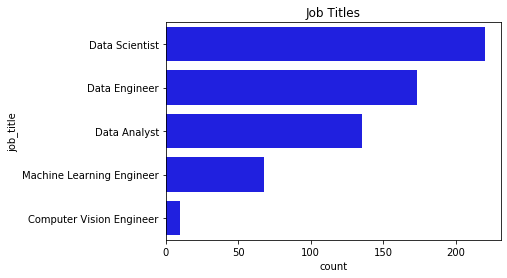

In [162]:
sns.countplot(data=data, y='job_title', color='blue', order=data['job_title'].value_counts().index)
plt.title('Job Titles')

> We can observe that the most popular job is data scientist. The second one is data engineer

In [163]:
cols = [i for i in data.columns if data[i].nunique()>5]
cols

['salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'company_location']

In [164]:
[i for i in cols if data[i].dtype == 'object']

['salary_currency', 'employee_residence', 'company_location']

In [165]:
for t in [i for i in cols if data[i].dtype == 'object']:
    print(f'{t} : {data[t].nunique()} unique values')
    print(data[t].unique(), end='\n\n')
    print(data[t].value_counts())
    print('----------------------------------')

salary_currency : 17 unique values
['EUR' 'USD' 'GBP' 'HUF' 'INR' 'JPY' 'CNY' 'MXN' 'CAD' 'DKK' 'PLN' 'SGD'
 'CLP' 'BRL' 'TRY' 'AUD' 'CHF']

USD    398
EUR     95
GBP     44
INR     27
CAD     18
TRY      3
JPY      3
PLN      3
MXN      2
DKK      2
HUF      2
AUD      2
SGD      2
BRL      2
CNY      1
CLP      1
CHF      1
Name: salary_currency, dtype: int64
----------------------------------
employee_residence : 57 unique values
['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'PL' 'PT' 'CN' 'GR'
 'AE' 'NL' 'MX' 'CA' 'AT' 'NG' 'PH' 'ES' 'DK' 'RU' 'IT' 'HR' 'BG' 'SG'
 'BR' 'IQ' 'VN' 'BE' 'UA' 'MT' 'CL' 'RO' 'IR' 'CO' 'MD' 'KE' 'SI' 'HK'
 'TR' 'RS' 'PR' 'LU' 'JE' 'CZ' 'AR' 'DZ' 'TN' 'MY' 'EE' 'AU' 'BO' 'IE'
 'CH']

US    331
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PK      6
PT      6
BR      6
NL      5
RU      4
PL      4
IT      4
VN      3
TR      3
AE      3
AT      3
AU      3
HU      2
SG      2
NG      2
RO      2
SI      2
BE      2
D

> This columns need to be more cleaned. We can observe that many values have occured one time. We can replace them all with "other" value.

In [166]:
sc_filter = data['salary_currency'].value_counts()[5:].index.tolist()
er_filter = data['employee_residence'].value_counts()[8:].index.tolist()
cl_filter = data['company_location'].value_counts()[8:].index.tolist()
cl_filter[:7]

['JP', 'PL', 'NL', 'PT', 'AT', 'LU', 'TR']

#### I will visualize these columns before & after mapping

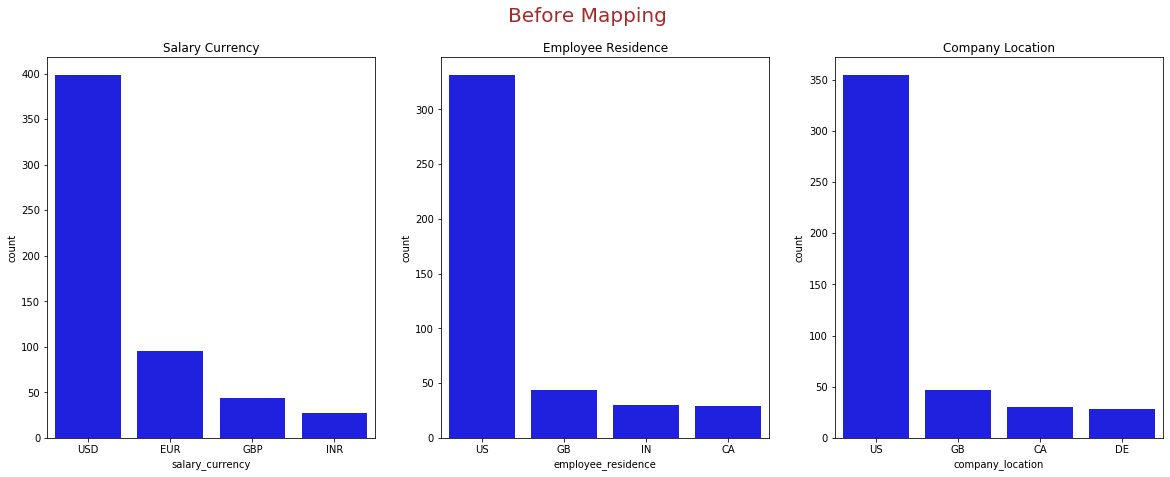

In [167]:
vis_count(data, [i for i in cols if data[i].dtype == 'object'], n_values=4, title='Before Mapping')

- Most currency is USD
- Most company location is in US
- Most employee's primary country of residence is in US

In [168]:
data['salary_currency'] = data['salary_currency'].map(lambda x :replace_item(x, 'other', sc_filter))
data['employee_residence'] = data['employee_residence'].map(lambda x :replace_item(x, 'other', er_filter))
data['company_location'] = data['company_location'].map(lambda x :replace_item(x, 'other', cl_filter))

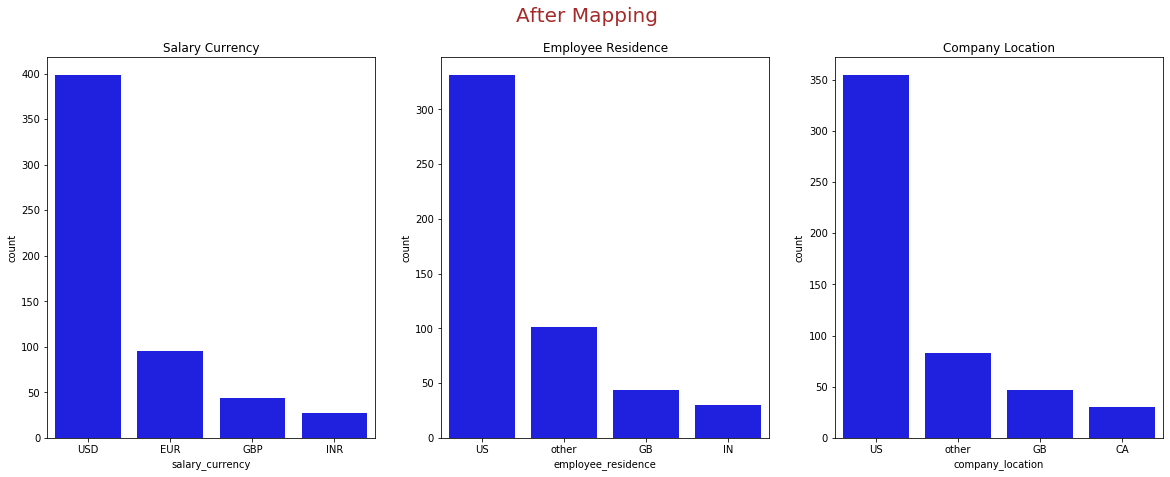

In [169]:
vis_count(data, [i for i in cols if data[i].dtype == 'object'], n_values=4, title='After Mapping')

In [170]:
numeric_cols = data.select_dtypes(exclude='object').columns.tolist()
numeric_cols

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

In [171]:
def vis_distribution(data, col):
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    sns.histplot(data=data, x=col)
    
    plt.subplot(122)
    sns.boxplot(data=data, x=col)
    
    plt.suptitle(col.title().replace('_', ' '), fontsize=20, color='brown')

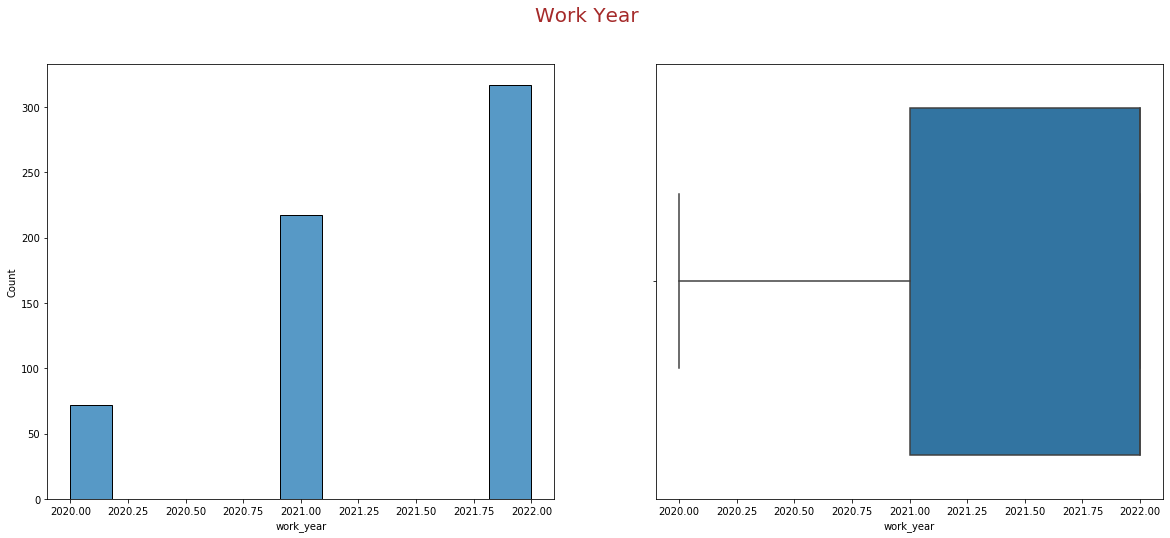

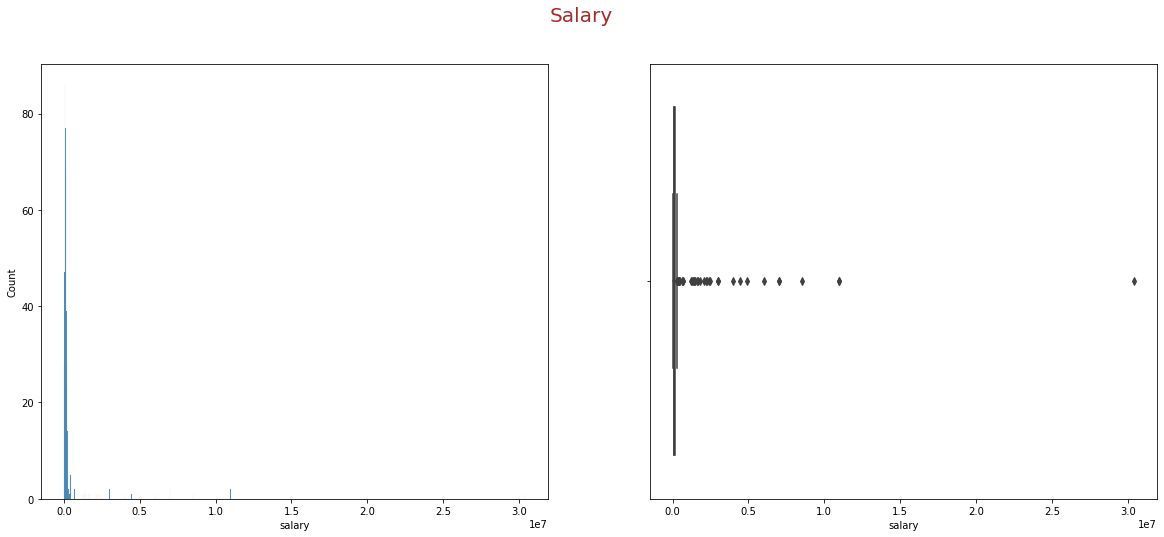

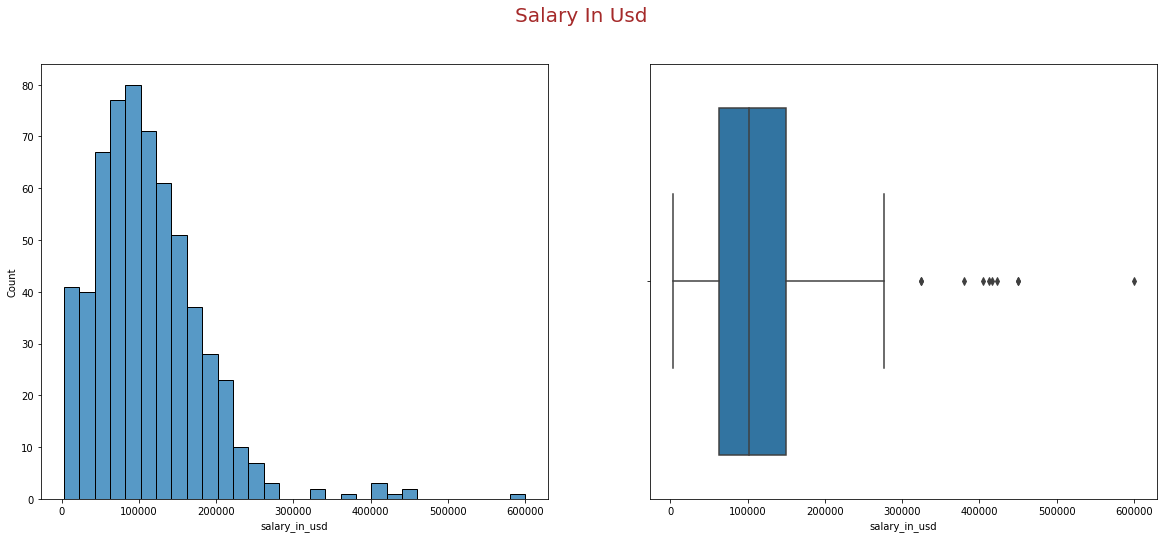

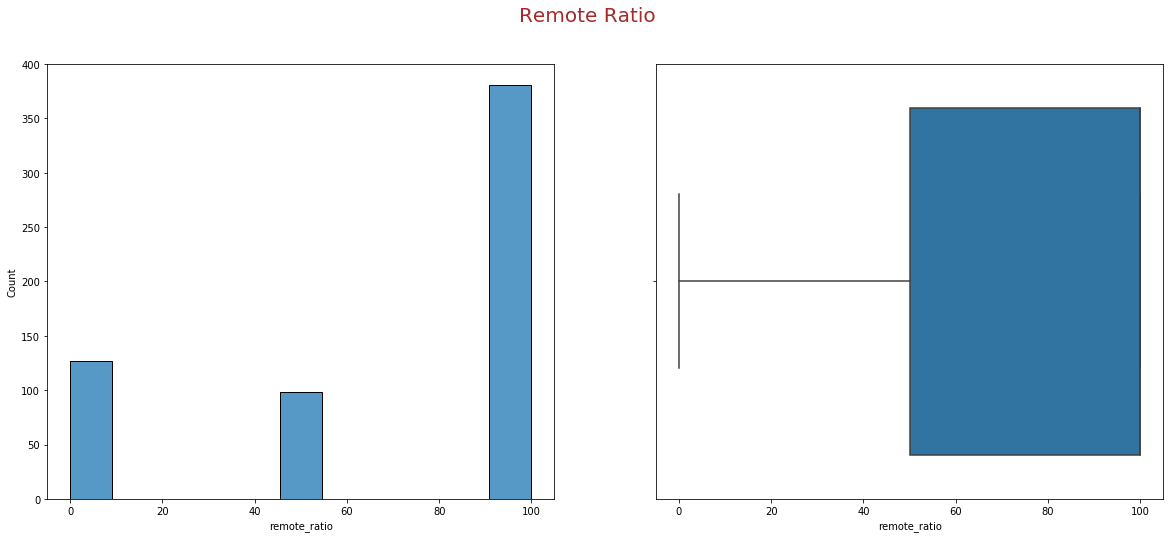

In [172]:
for i in numeric_cols:
    vis_distribution(data, i)

> We have outliers values in both salary & salary in USD columns. We need to fix these outliers

In [173]:
data['salary'].describe()

count    6.060000e+02
mean     3.241387e+05
std      1.545630e+06
min      4.000000e+03
25%      7.000000e+04
50%      1.140000e+05
75%      1.649990e+05
max      3.040000e+07
Name: salary, dtype: float64

In [174]:
# IQR = np.percentile(data['salary'], 75) - np.percentile(data['salary'], 25)
# IQR

In [175]:
from scipy.stats import iqr
IQR = iqr(data['salary'])
IQR

94999.0

#### Lets deal with outliers

In [176]:
q3 = np.percentile(data['salary'], 75)
q1 = np.percentile(data['salary'], 25)
print(q3, q1)

164999.0 70000.0


In [177]:
upper_bound = q3 + (IQR*1.5)
print(upper_bound)

307497.5


In [178]:
data['salary'].median()

114000.0

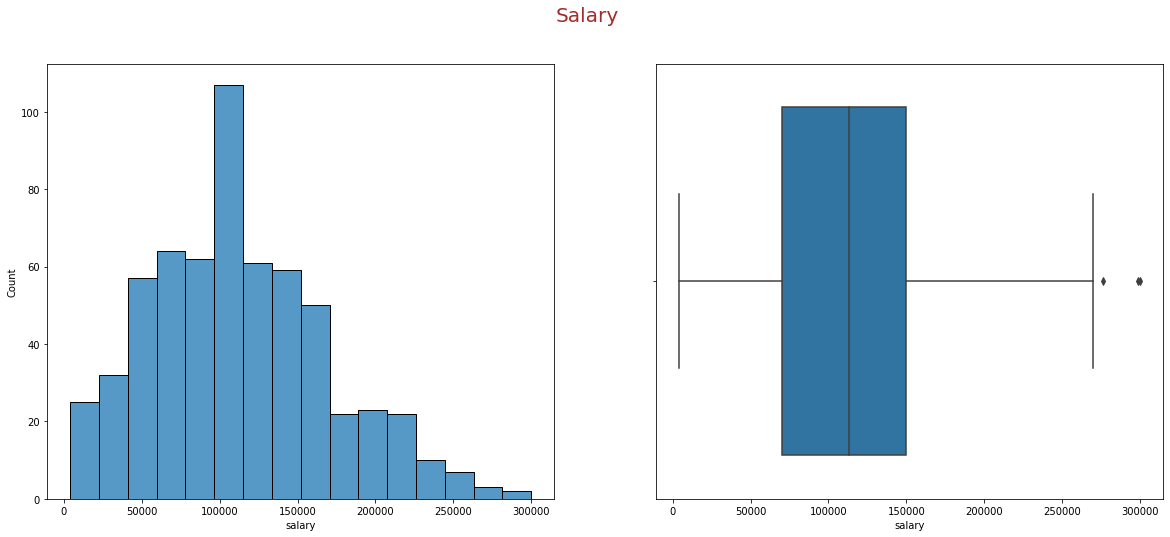

In [179]:
data['salary'] = np.where(data['salary']>upper_bound, data['salary'].median(), data['salary'])
vis_distribution(data, 'salary')

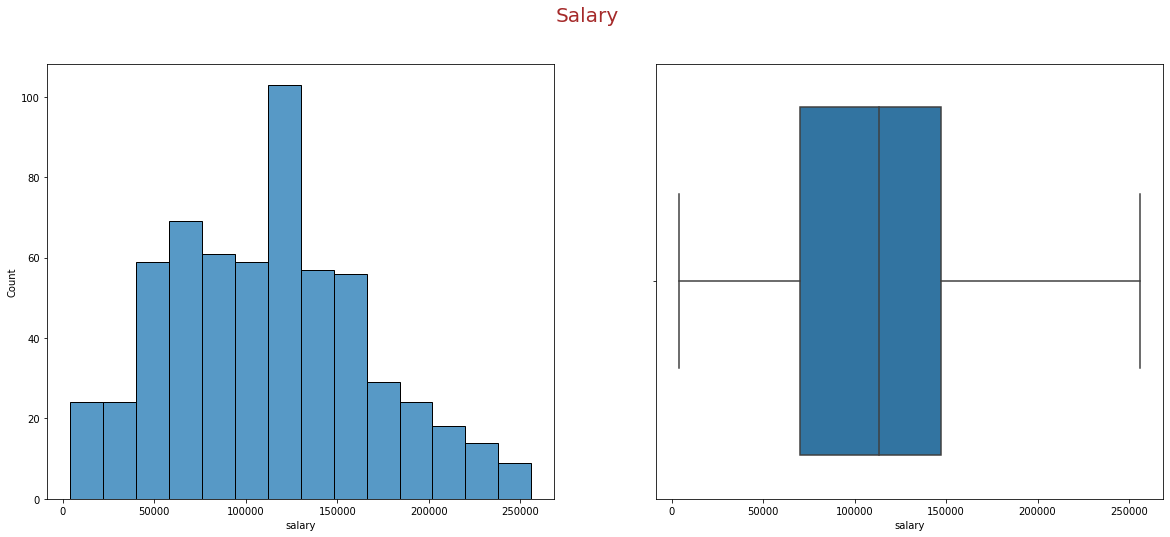

In [180]:
# We need to replace these two outliers 
per_99 = np.percentile(data['salary'], 99)
data['salary'] = np.where(data['salary']>per_99, data['salary'].median(), data['salary'])
vis_distribution(data, 'salary')

#### When mean is close to median, that mean the data is balace (have no outliers)

In [181]:
int(data['salary'].mean())

111084

In [182]:
data['salary'].median()

113250.0

> Now, we have cleaned version of salary column. **Lets go to the next column which is salary in USD**

In [183]:
int(data['salary_in_usd'].mean())

112421

In [184]:
data['salary_in_usd'].median()

101835.0

In [185]:
(iqr(data['salary_in_usd'])) + np.percentile(data['salary_in_usd'], 75)

237027.75

In [186]:
per_98 = np.percentile(data['salary_in_usd'], 98)
per_98

265759.9999999999

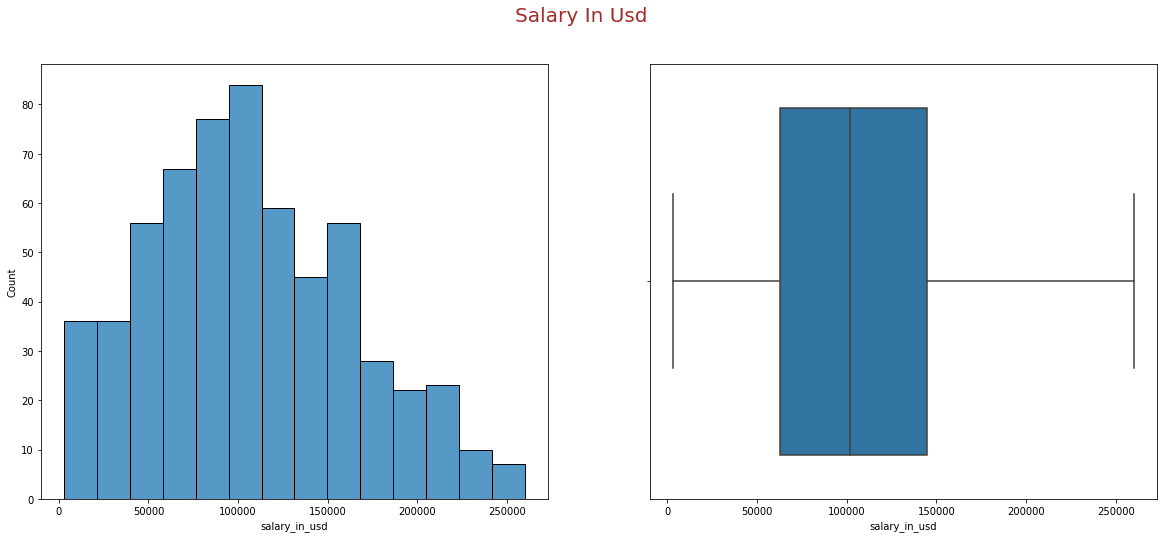

In [187]:
data['salary_in_usd'] = np.where(data['salary_in_usd']>=per_98, data['salary_in_usd'].median(), data['salary_in_usd'])
vis_distribution(data, 'salary_in_usd')

We now don't have any outliers in our data

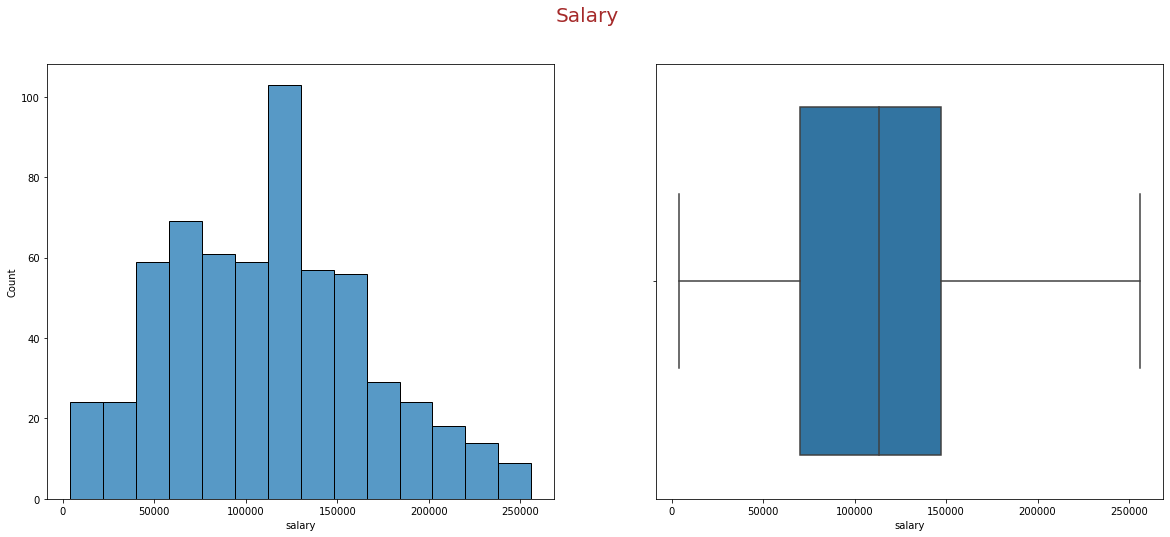

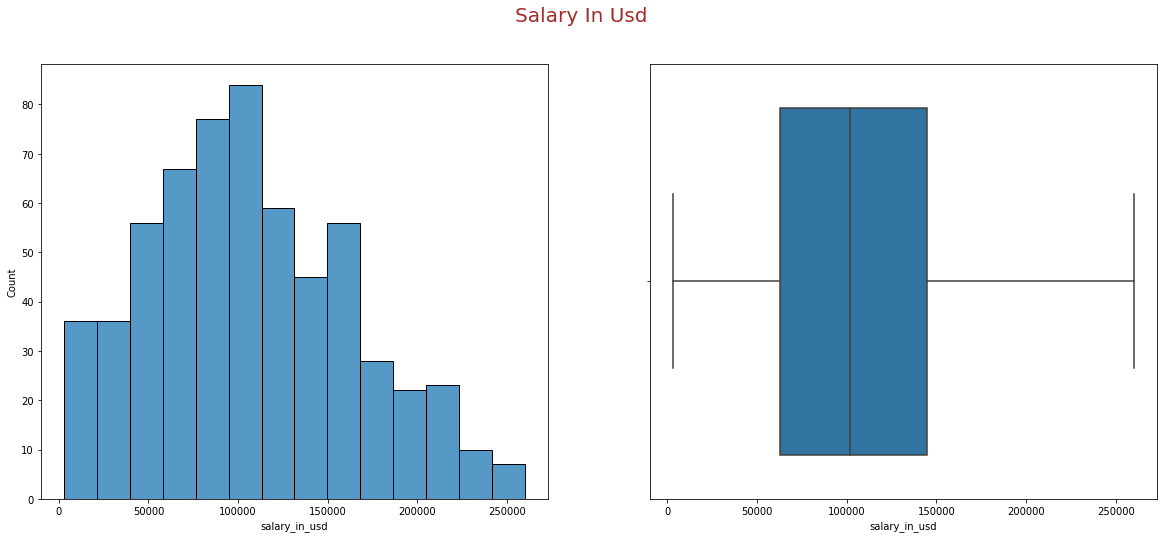

In [188]:
for col in numeric_cols[1:3]:
    vis_distribution(data, col)

In [189]:
data[['salary', 'salary_in_usd']].describe()

,salary,salary_in_usd
count,606.000000,606.000000
mean,111084.391089,106359.778878
std,54166.681721,56892.593599
min,4000.000000,2859.000000
25%,70000.000000,62972.250000
50%,113250.000000,101702.500000
75%,147000.000000,144963.500000
max,256000.000000,260000.000000


- The minium salary is 4000 & the maxium is 256 000
- The most popular salary is between 70 000 and 150 000

## EDA

Text(0.5, 1.0, 'Employment Type Over Years')

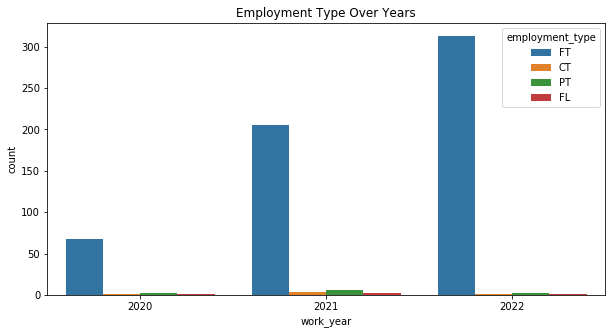

In [190]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='work_year', hue='employment_type')
plt.title('Employment Type Over Years')

Text(0.5, 1, 'Correlation Between Features')

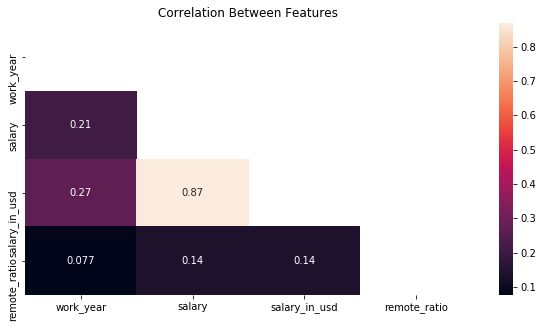

In [191]:
corr = data.corr()
mask = np.triu(corr)
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, mask=mask)
plt.title('Correlation Between Features')

Text(0.5, 1.0, 'Salary According to Experience Level')

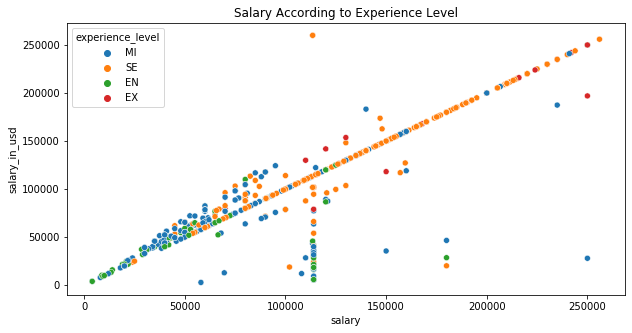

In [192]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='salary', y='salary_in_usd', hue='experience_level')
plt.title('Salary According to Experience Level')

> We can observe that the highest salary is for senior level, but we can see that some seniors take more than 150 000 while others take less than 150 000
- A few seniors take salary as intermediate level

Text(0.5, 1, 'Salary According to Experience Level & Job Title')

<Figure size 720x360 with 0 Axes>

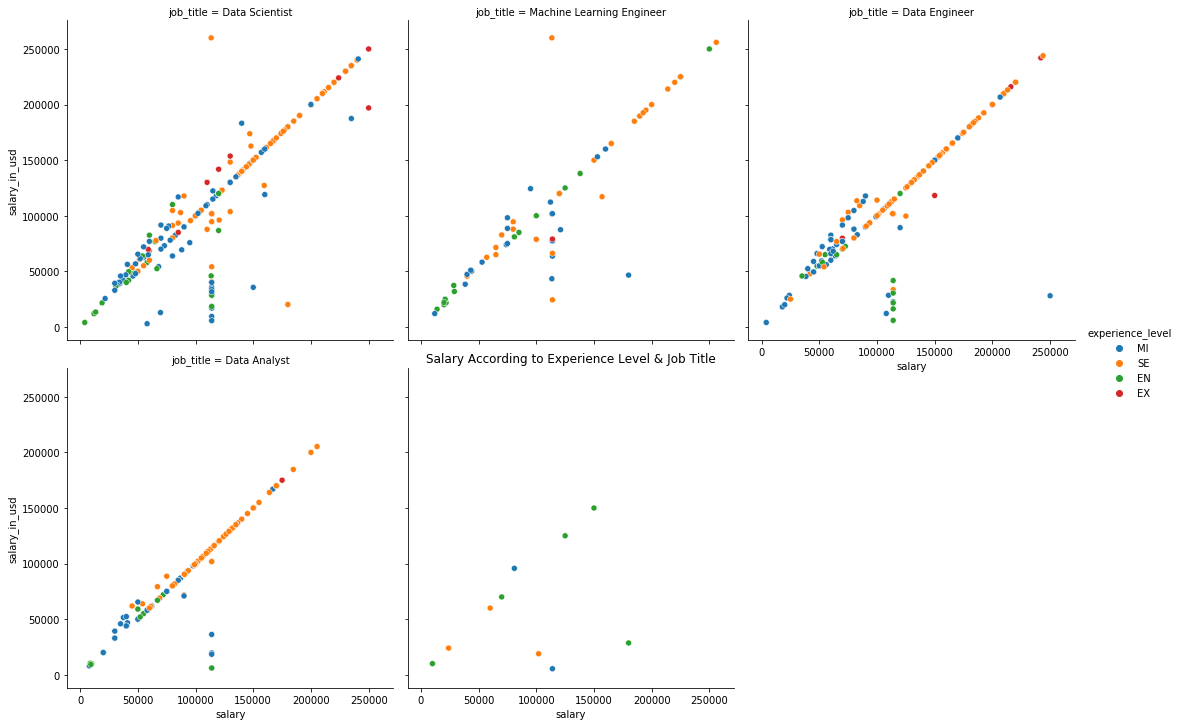

In [193]:
plt.figure(figsize=(10,5))
sns.relplot(data=data, x='salary', y='salary_in_usd', col='job_title', col_wrap=3, hue='experience_level')
plt.title('Salary According to Experience Level & Job Title')

- In all fields, the most developers are in senior level except machine learning field according to our data.

In [206]:
def vis_bar(data, x, y, title, hue=None):
    plt.figure(figsize=(15,7))
    sns.barplot(data=data, y=y, x=x, hue=hue)
    plt.title(title, fontsize=18)

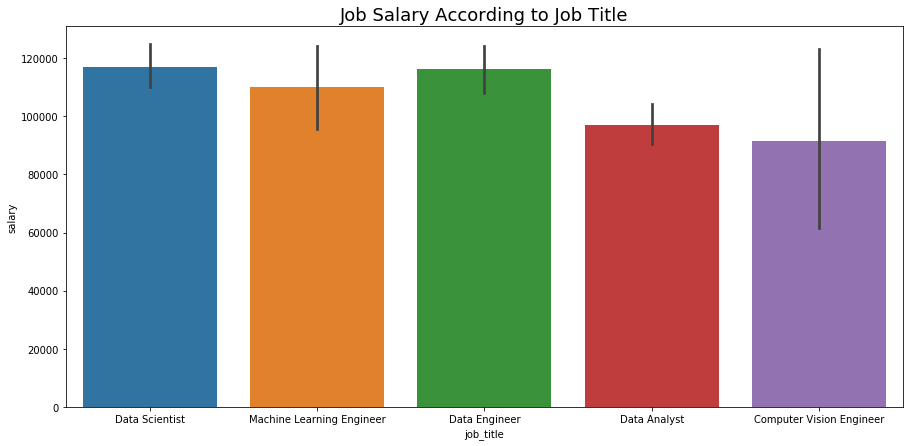

In [207]:
vis_bar(data, 'job_title', 'salary', 'Job Salary According to Job Title')

- All feilds like data science, machine learning or data engineering and so on have approximatliy salary.

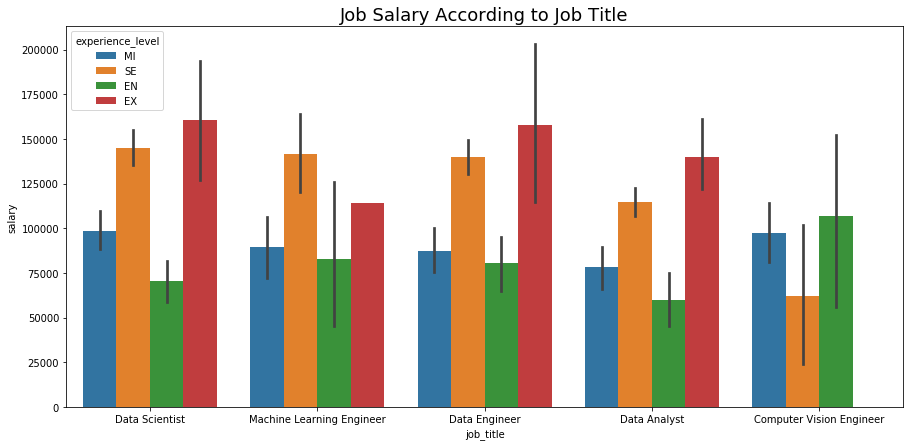

In [208]:
vis_bar(data, 'job_title', 'salary', 'Job Salary According to Job Title', 'experience_level')

**Some notes from this plot**
- According to entry-level, The highest salary for them is in computer vision and machine learning fields
- According to mid-level, the salary in most fields are approximately the same
- According to senior level, data analysis and computer vision are the lowerest salaries for seniors. **But we can't take this in attention, because the number of computer vision engineers in data is a few**
- According to Executive-level, the highest salaries are for data engineer and data science.

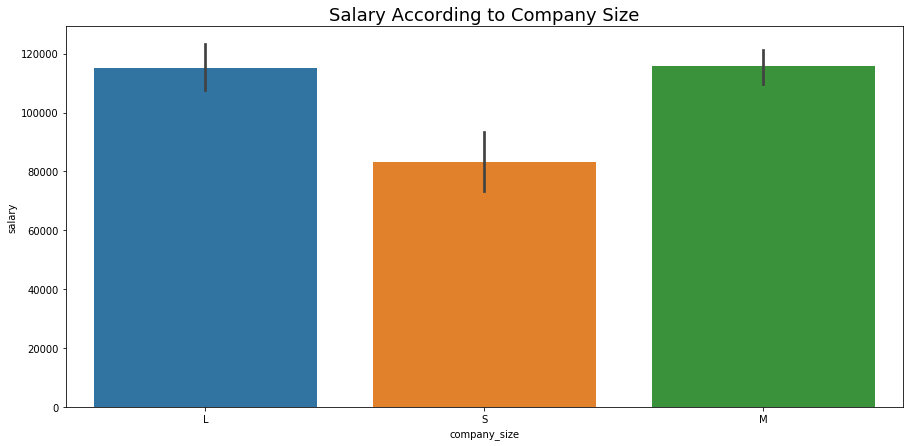

In [213]:
vis_bar(data, 'company_size', 'salary', 'Salary According to Company Size')

- According to medium and large companies, their salaries are approximately the same
- The range is from 105,000 to 120,000 in the large and medium companies.
- The range is from 70,000 to 90,000 in the small companies.

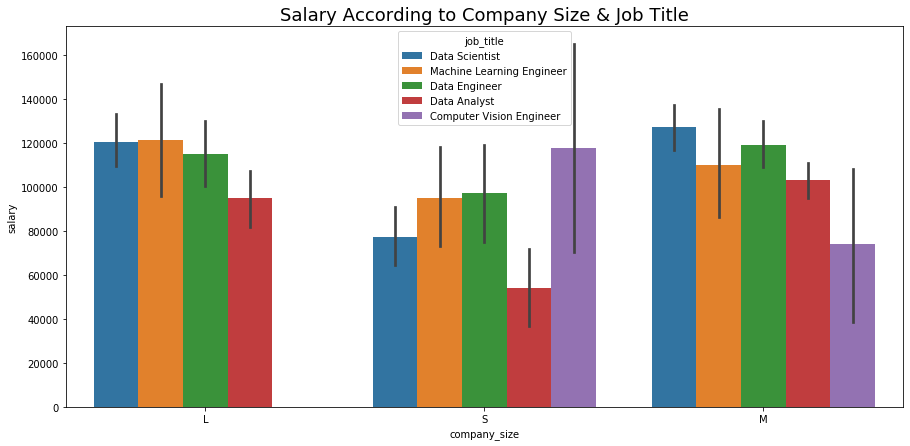

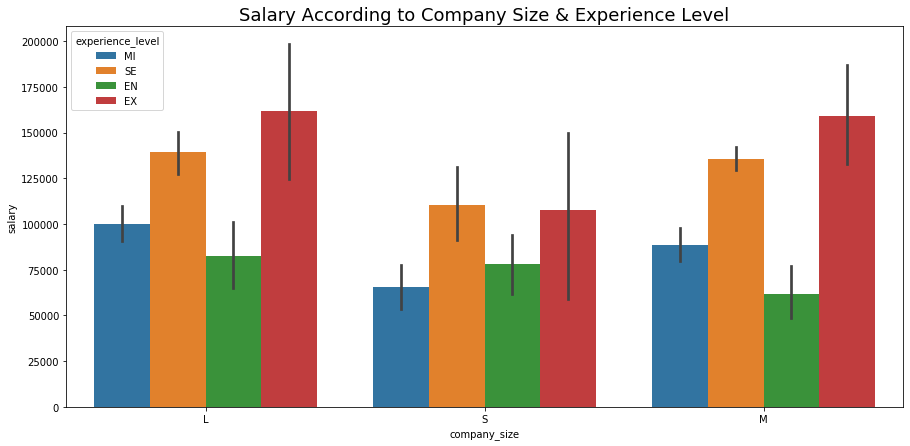

In [218]:
vis_bar(data, 'company_size', 'salary', 'Salary According to Company Size & Job Title', 'job_title')
vis_bar(data, 'company_size', 'salary', 'Salary According to Company Size & Experience Level', 'experience_level')

- we can observe that the salaries are all approximately the same (data science, machine learning, data engineering, etc) in companies